In [20]:
# from time_series_scripts import data_compress
import pandas as pd 
import numpy as np 

import sys
import os 
sys.path.append('../') # going a step back so the importer can find the following module
from time_series_scripts import data_compress_data as dcd
from time_series_scripts import data_compress as dc 
from time_series_scripts import cycle_count as cc 

# name = "user02_lab.csv" # - 13
# name = "user02_fluorescent.csv" # - 15
# name = "user02_fluorescent_led.csv" # - 13
# name = "user02_led.csv" # - python - 12 - esp 17
# name = "user02_natural.csv" # - python - 12 - esp 15 
class_num = 4
name = "user02_fluorescent.csv" # - python - 12 - esp 15 
# file_path = f'../../event_csv/compress_event_manhattan/class{class_num}/smooth_by_pca/compress_by_mean/{name}'
file_path = f'../../event_csv/split_data/class{class_num}/{name}'


In [21]:
df = pd.read_csv(file_path)

<Axes: >

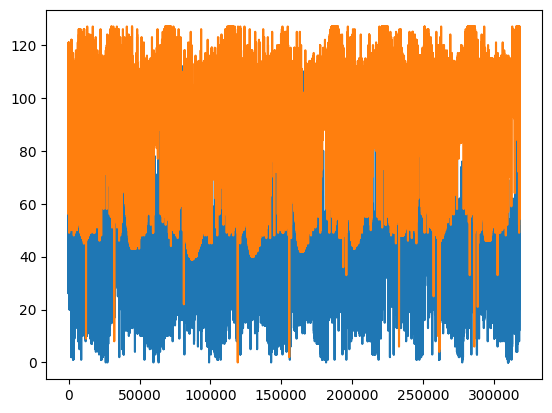

In [22]:
df['x'].plot()
df['y'].plot()

# filtering data with manhattan

In [23]:
manhattan_df = dcd.compress_by_Manhattan(df) 

/home/rlwagun/Files/action_count_in_events3/all_code/time_series/../time_series_scripts/data_compress_data.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d1,d2 = compute_distance(row[1],row[2], df['x'][index+1],df['y'][index+1])
/home/rlwagun/Files/action_count_in_events3/all_code/time_series/../time_series_scripts/data_compress_data.py:96: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame([[temp_x/count, temp_y/count]], columns= ['x', 'y'])], ignore_index=True)
/home/rlwagun/Files/action_count_in_events3/all_code/tim

# plot using the pca 
1. does the pca 
2. applies the hp filtering 

<Axes: >

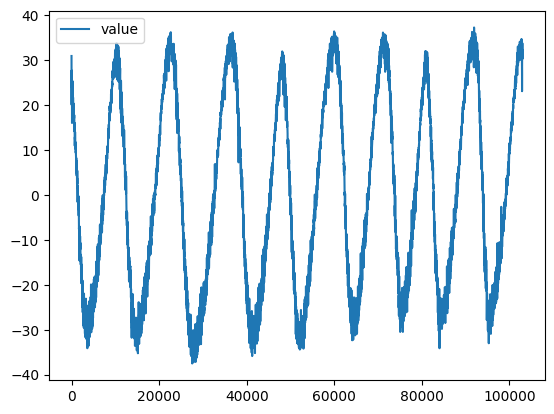

In [24]:
pca_df = dcd.dimensionality_reduction_PCA(manhattan_df)
pca_df.plot()

<Axes: >

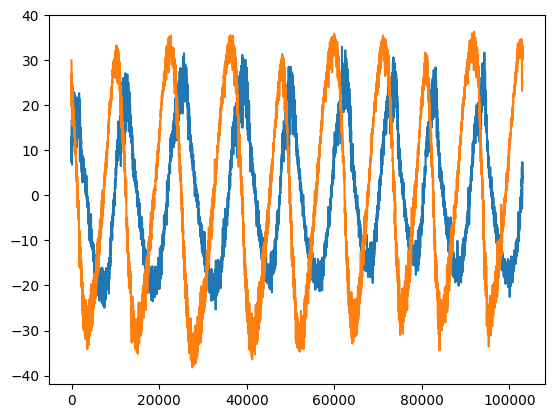

In [25]:
import statsmodels.api as sm 
_, smooth_x = sm.tsa.filters.hpfilter(manhattan_df['x']) 
_, smooth_y = sm.tsa.filters.hpfilter(manhattan_df['y']) 

smooth_x = smooth_x-smooth_x.mean()
smooth_y = smooth_y -smooth_y.mean()

smooth_x.plot()
smooth_y.plot()

In [26]:
smooth_x.describe(), smooth_y.describe()

(count    1.029610e+05
 mean     3.957359e-15
 std      1.468767e+01
 min     -2.531985e+01
 25%     -1.364033e+01
 50%     -2.354778e+00
 75%      1.343016e+01
 max      3.300636e+01
 Name: x_trend, dtype: float64,
 count    1.029610e+05
 mean     1.752545e-14
 std      2.196835e+01
 min     -3.820939e+01
 25%     -2.088006e+01
 50%     -9.245500e-01
 75%      2.119924e+01
 max      3.639823e+01
 Name: y_trend, dtype: float64)

In [27]:
print("std x and y ", smooth_x.std(), smooth_y.std(), "x > y", smooth_x.std() > smooth_y.std())
smooth_x.max() - smooth_x.min(), smooth_y.max() - smooth_y.min()

std x and y  14.68766892999119 21.968352133822695 x > y False


(np.float64(58.32620851400098), np.float64(74.60762794268335))

# mean compression for the pca 

/home/rlwagun/Files/action_count_in_events3/all_code/time_series/../time_series_scripts/data_compress_data.py:161: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame(chunk.mean(), columns=['value'])], ignore_index=True)


<Axes: >

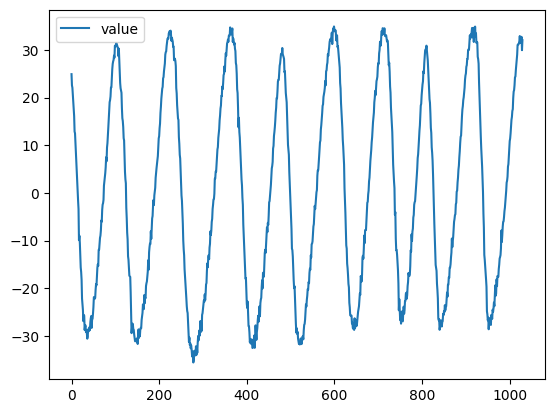

In [28]:
pca_mean_df = dcd.compress_by_mean(pca_df)
pca_mean_df.plot()

# mean compression for x 

In [29]:
_x = pd.DataFrame(smooth_x)

/home/rlwagun/Files/action_count_in_events3/all_code/time_series/../time_series_scripts/data_compress_data.py:161: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame(chunk.mean(), columns=['value'])], ignore_index=True)
/home/rlwagun/Files/action_count_in_events3/all_code/time_series/../time_series_scripts/data_compress_data.py:161: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame(chunk.mean(), columns=['value'])], ignore_index=Tr

<Axes: >

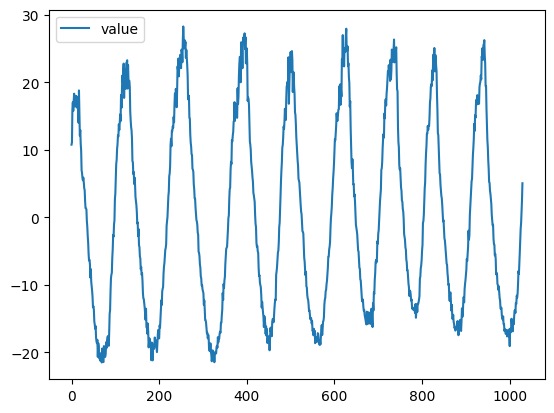

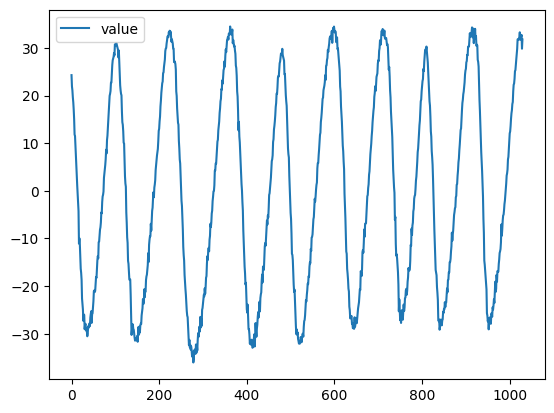

In [30]:
mean_x_df = dcd.compress_by_mean(pd.DataFrame(smooth_x))
mean_y_df = dcd.compress_by_mean(pd.DataFrame(smooth_y))

mean_x_df.plot()
mean_y_df.plot()

# count from the PCA

In [31]:
test_pca_data_df = pca_mean_df['value'] # [:500]
win_change,top_win,win_size,step = cc.get_index_of_bottom_and_top_by_mk(test_pca_data_df)
print(
    "count from python ", 
    cc.get_dtw_mean_cost(win_change, top_win, test_pca_data_df))

 count top: 8 and count bottom: 9
count from python  9


 count top: 8 and count bottom: 9
count from python  9


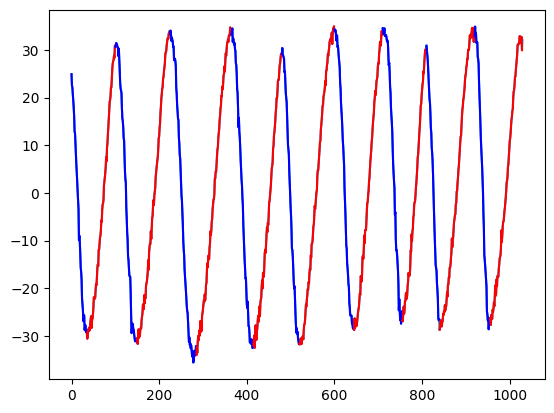

In [32]:
import matplotlib.pyplot as plt 
plt.plot(test_pca_data_df)
current = 0 
start = 0 
for i , (win, trend) in enumerate(zip(win_change, top_win)):
    if i == 0:
        start = win
        current = trend
        continue
    plt.plot(test_pca_data_df[start: win], color='red' if current else 'blue')
    start = win 
    current = trend 
print(
    "count from python ", 
    cc.get_dtw_mean_cost(win_change, top_win, test_pca_data_df))

# count from the x axis 

In [33]:
test_x_data_df = mean_x_df['value'] # [:500]
win_change,top_win,win_size,step = cc.get_index_of_bottom_and_top_by_mk(test_x_data_df)
print(
    "count from python ", 
    cc.get_dtw_mean_cost(win_change, top_win, test_x_data_df))

 count top: 8 and count bottom: 9
count from python  9


 count top: 8 and count bottom: 9
count from python  9


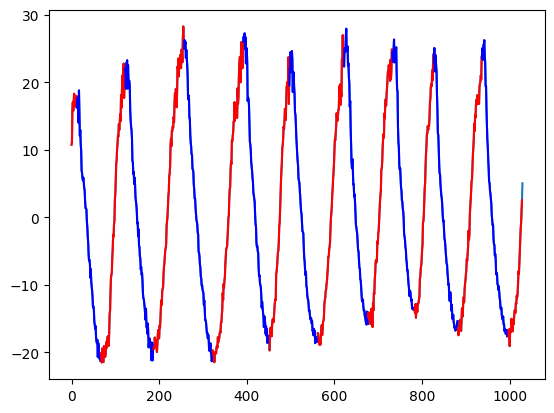

In [34]:
import matplotlib.pyplot as plt 
plt.plot(test_x_data_df)
current = 0 
start = 0 
for i , (win, trend) in enumerate(zip(win_change, top_win)):
    if i == 0:
        start = win
        current = trend
        continue
    plt.plot(test_x_data_df[start: win], color='red' if current else 'blue')
    start = win 
    current = trend 
print(
    "count from python ", 
    cc.get_dtw_mean_cost(win_change, top_win, test_x_data_df))

# count from the y axis 

In [35]:
test_y_data_df = mean_y_df['value'] # [:500]
win_change,top_win,win_size,step = cc.get_index_of_bottom_and_top_by_mk(test_y_data_df)
print(
    "count from python ", 
    cc.get_dtw_mean_cost(win_change, top_win, test_y_data_df))

 count top: 8 and count bottom: 9
count from python  9


 count top: 8 and count bottom: 9
count from python  9


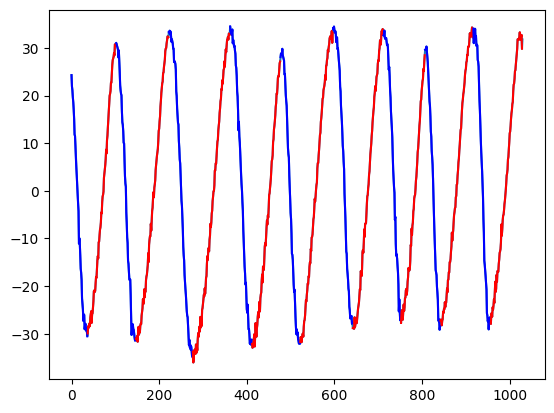

In [36]:
import matplotlib.pyplot as plt 
plt.plot(test_y_data_df)
current = 0 
start = 0 
for i , (win, trend) in enumerate(zip(win_change, top_win)):
    if i == 0:
        start = win
        current = trend
        continue
    plt.plot(test_y_data_df[start: win], color='red' if current else 'blue')
    start = win 
    current = trend 
print(
    "count from python ", 
    cc.get_dtw_mean_cost(win_change, top_win, test_y_data_df))

 count top: 8 and count bottom: 9
count from python  9
 count top: 8 and count bottom: 9
 count top: 8 and count bottom: 9
count from python  9
 count top: 8 and count bottom: 9
 count top: 8 and count bottom: 9
count from python  9
 count top: 8 and count bottom: 9


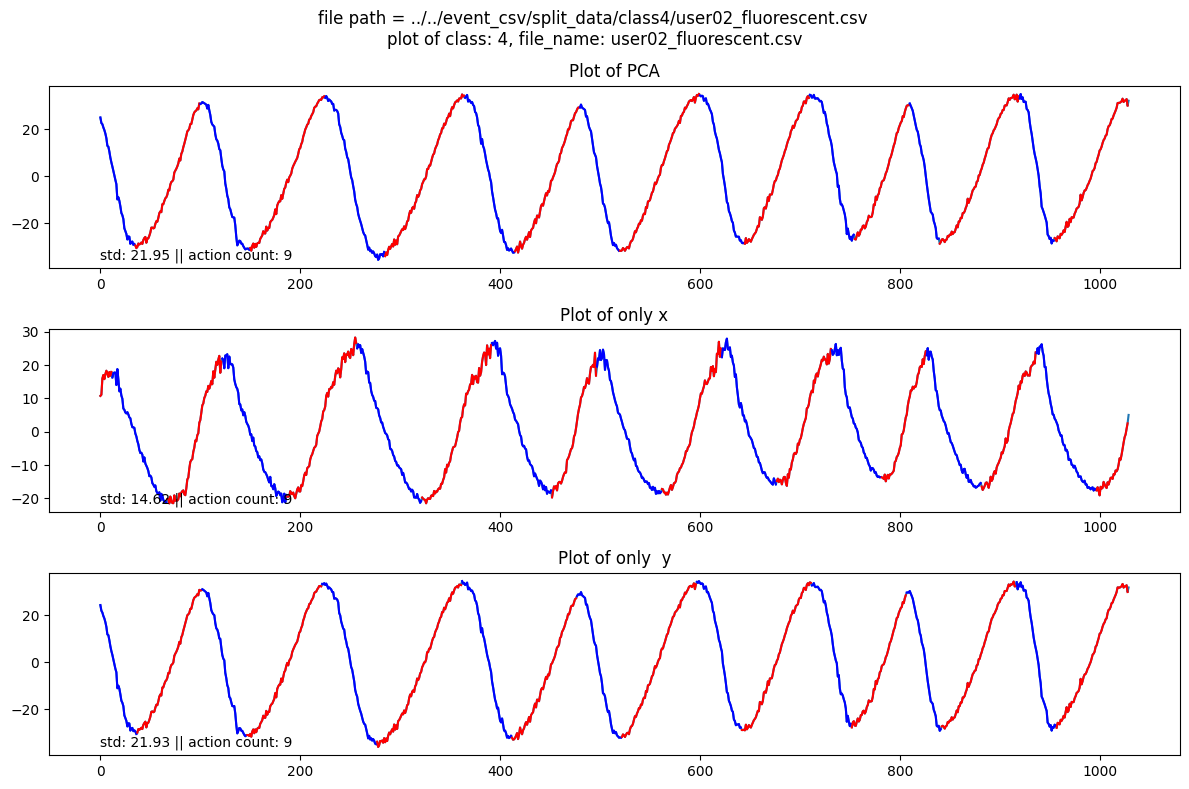

In [37]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, figsize=(12, 8))  # Width: 10 inches, Height: 6 inches


fig.suptitle(f"file path = {file_path} \nplot of class: {class_num}, file_name: {name}")

plot_names  = ["PCA", "only x", "only  y"]
for index, data_df in enumerate([test_pca_data_df, test_x_data_df, test_y_data_df]):
    win_change,top_win,win_size,step = cc.get_index_of_bottom_and_top_by_mk(data_df)
    
    axs[index].plot(data_df)
    current = 0 
    start = 0 
    for i , (win, trend) in enumerate(zip(win_change, top_win)):
        if i == 0:
            start = win
            current = trend
            continue
        axs[index].plot(data_df[start: win], color='red' if current else 'blue')
        start = win 
        current = trend 
    print(
        "count from python ", 
        cc.get_dtw_mean_cost(win_change, top_win, data_df))
    current_counts = cc.get_dtw_mean_cost(win_change, top_win, data_df)
    axs[index].set_title(f"Plot of {plot_names[index]}")
    axs[index].text(0, data_df.min(), f"std: {data_df.std():.2f} || action count: {current_counts}")

# axs[3].plot([a for a in range(len(data_df))])

# plt.text(1.5, 0, "Important Information")
plt.tight_layout()
# Save the plot
os.makedirs(f"./figs/class{class_num}/", exist_ok=True)
plt.savefig(f"./figs/class{class_num}/{name.split('.')[0] + '.png'}")
plt.show()